In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\15jan\OneDrive\build\Desktop\DA Project\dataset\delhi_metro_updated.csv")
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [3]:
df.shape

(150000, 10)

In [4]:
df.isnull().sum()

TripID                    0
Date                      0
From_Station              0
To_Station                0
Distance_km               0
Fare                      0
Cost_per_passenger        0
Passengers             1500
Ticket_Type            1500
Remarks               26257
dtype: int64

In [5]:
df.dtypes

TripID                  int64
Date                   object
From_Station           object
To_Station             object
Distance_km           float64
Fare                  float64
Cost_per_passenger    float64
Passengers            float64
Ticket_Type            object
Remarks                object
dtype: object

In [6]:
# Standardize Remarks 
df['Remarks'] = df['Remarks'].str.lower().fillna('normal')

In [7]:
df.isnull().sum()

TripID                   0
Date                     0
From_Station             0
To_Station               0
Distance_km              0
Fare                     0
Cost_per_passenger       0
Passengers            1500
Ticket_Type           1500
Remarks                  0
dtype: int64

In [8]:
#  Handle Missing Values 
# Fill missing Ticket_Type 
df['Ticket_Type'].fillna(df['Ticket_Type'].mode()[0], inplace=True)

C:\Users\15jan\AppData\Local\Temp\ipykernel_25860\3575533116.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ticket_Type'].fillna(df['Ticket_Type'].mode()[0], inplace=True)


In [9]:
df.isnull().sum()

TripID                   0
Date                     0
From_Station             0
To_Station               0
Distance_km              0
Fare                     0
Cost_per_passenger       0
Passengers            1500
Ticket_Type              0
Remarks                  0
dtype: int64

In [10]:
# Clean Station Names 
# Strip extra spaces and standardize capitalization
df['From_Station'] = df['From_Station'].str.strip().str.title()
df['To_Station'] = df['To_Station'].str.strip().str.title()

In [11]:
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [12]:
# Convert numeric columns 
num_cols = ['Distance_km', 'Fare', 'Cost_per_passenger', 'Passengers']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [14]:
# Using Z-score method for Fare and Cost_per_passenger
from scipy import stats

for col in ['Fare', 'Cost_per_passenger']:
    z = np.abs(stats.zscore(df[col]))
    df = df[z < 3]  # Keep only values within 3 standard deviations

In [15]:
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [16]:
#Check and Remove Duplicates 
df.drop_duplicates(subset=['Date', 'From_Station', 'To_Station', 'Ticket_Type'], inplace=True)

In [17]:
duplicates = df[df.duplicated(subset=['Date', 'From_Station', 'To_Station', 'Ticket_Type'])]
print(f"Duplicate rows found: {duplicates.shape[0]}")

Duplicate rows found: 0


In [18]:
#  Validate Fare Calculation
# Create a check column to validate Fare ≈ Cost_per_passenger * Passengers
df['Calculated_Fare'] = df['Cost_per_passenger'] * df['Passengers']
df['Fare_Mismatch'] = np.where(abs(df['Fare'] - df['Calculated_Fare']) > 5, True, False)

In [19]:
# Handle mismatches
# You can choose to adjust fare or just note them
print("\nNumber of fare mismatches:", df['Fare_Mismatch'].sum())


Number of fare mismatches: 140677


In [20]:
df.to_csv("delhi_metro_cleaned.csv", index=False)
print("Succsessfully Saved")

Succsessfully Saved


In [21]:
df=pd.read_csv(r"C:\Users\15jan\OneDrive\build\Desktop\DA Project\dataset\delhi_metro_cleaned.xls")
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks,Calculated_Fare,Fare_Mismatch,Fare_per_km,Route
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance,237.51,True,6.027048,Inderlok → Kashmere Gate
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance,1255.65,True,15.403433,Model Town → Dilshad Garden
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak,393.30,True,11.573741,Kashmere Gate → Netaji Subhash Place
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance,404.46,True,35.853234,Chandni Chowk → Hauz Khas
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak,1928.32,True,10.865424,Rajiv Chowk → Kalkaji Mandir


In [22]:
import seaborn as sns

In [23]:
# Set up plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

In [24]:
df['Ticket_Type'].unique()

array(['Smart Card', 'Tourist Card', 'Single', 'Return'], dtype=object)

In [25]:
df.shape

(142456, 14)

In [26]:
df['Remarks'].unique()

array(['maintenance', 'off-peak', 'normal', 'peak', 'festival', 'weekend'],
      dtype=object)

In [27]:
df.describe()

,TripID,Distance_km,Fare,Cost_per_passenger,Passengers,Calculated_Fare,Fare_per_km
count,142456.000000,142456.000000,142456.000000,142456.000000,141047.000000,141047.000000,142456.000000
mean,74976.226807,5.491353,105.139405,62.473415,19.997143,1249.163800,42.377340
std,43300.937442,4.983113,54.877190,33.202450,4.466342,735.629634,52.105356
min,1.000000,0.500000,10.000000,5.000000,4.000000,32.700000,0.255943
25%,37461.750000,1.940000,57.620000,33.690000,17.000000,639.000000,10.715036
50%,75000.500000,3.960000,105.210000,62.520000,20.000000,1185.410000,23.361897
75%,112441.250000,7.420000,152.600000,91.190000,23.000000,1774.450000,51.648886
max,150000.000000,63.030000,200.000000,120.000000,41.000000,4688.000000,396.940000


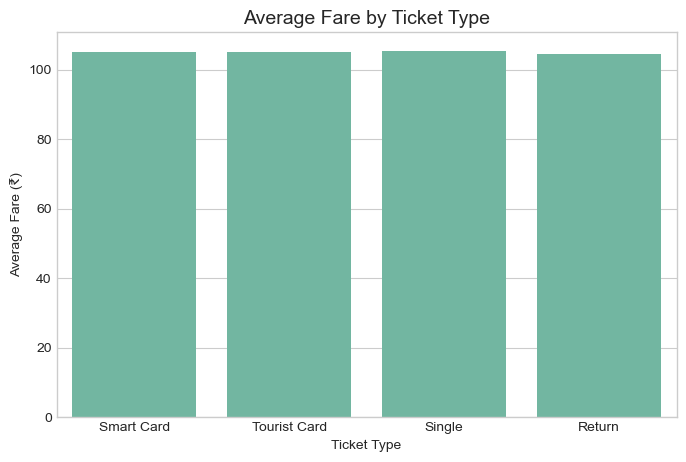

In [28]:
# Average Fare by Ticket Type 
plt.figure(figsize=(8,5))
sns.barplot(x='Ticket_Type', y='Fare', data=df, estimator='mean', errorbar=None)
plt.title("Average Fare by Ticket Type", fontsize=14)
plt.ylabel("Average Fare (₹)")
plt.xlabel("Ticket Type")
plt.show()

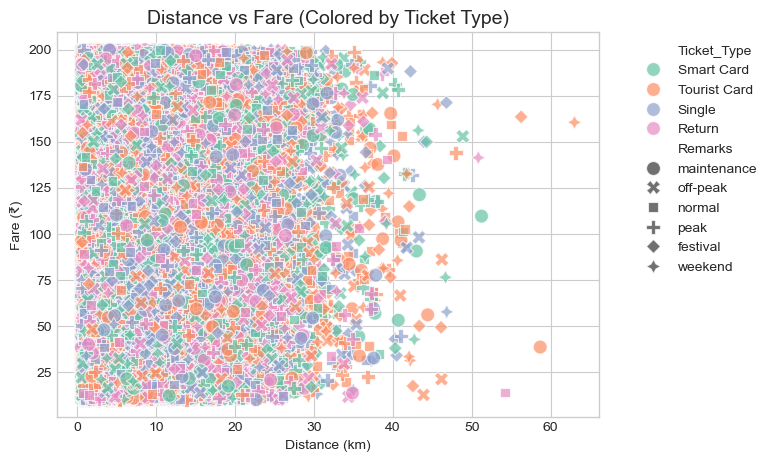

In [29]:
# Distance vs Fare Relationship 
plt.figure(figsize=(7,5))
sns.scatterplot(x='Distance_km', y='Fare', hue='Ticket_Type', style='Remarks', s=100, alpha=0.7, data=df)
plt.title("Distance vs Fare (Colored by Ticket Type)", fontsize=14)
plt.xlabel("Distance (km)")
plt.ylabel("Fare (₹)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

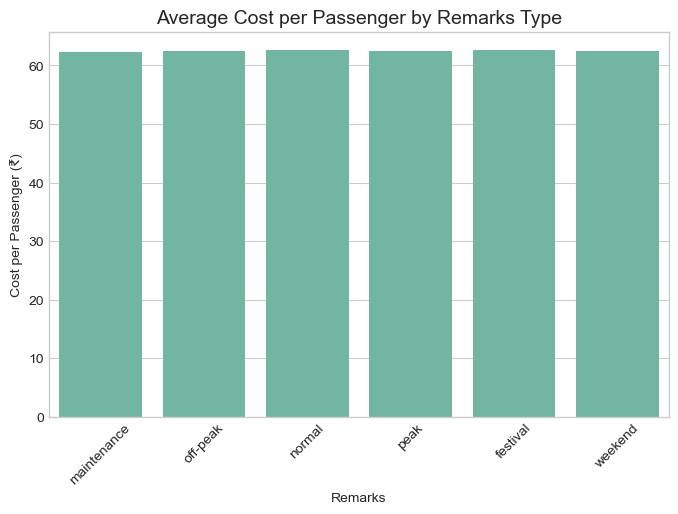

In [30]:
# Average Cost per Passenger by Remarks
plt.figure(figsize=(8,5))
sns.barplot(x='Remarks', y='Cost_per_passenger', data=df, estimator='mean', errorbar=None)
plt.title("Average Cost per Passenger by Remarks Type", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Cost per Passenger (₹)")
plt.show()

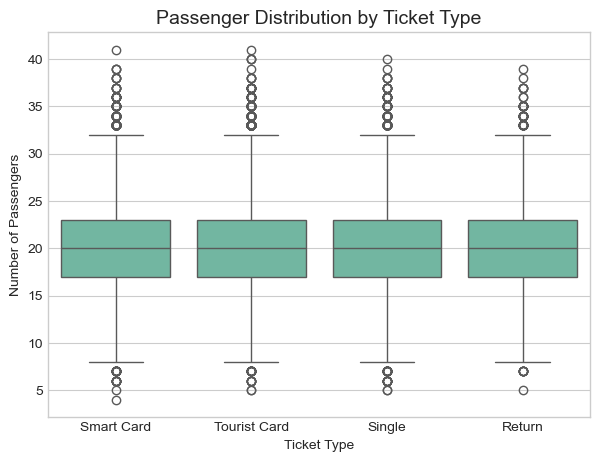

In [31]:
# Passenger Count by Ticket Type 
plt.figure(figsize=(7,5))
sns.boxplot(x='Ticket_Type', y='Passengers', data=df)
plt.title("Passenger Distribution by Ticket Type", fontsize=14)
plt.ylabel("Number of Passengers")
plt.xlabel("Ticket Type")
plt.show()

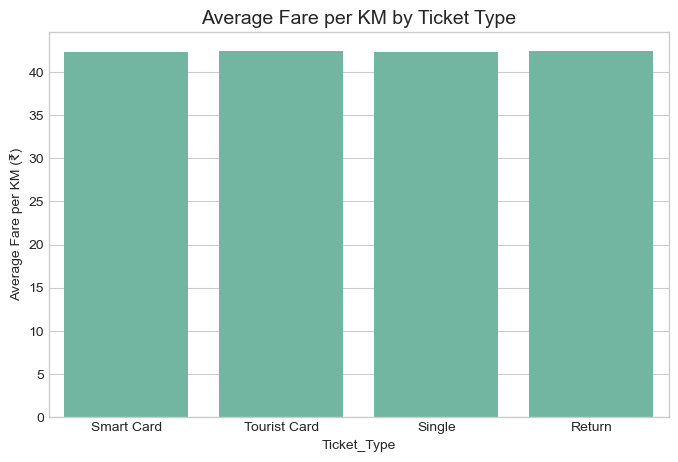

In [32]:
# Fare per KM (Efficiency Metric) 
df['Fare_per_km'] = df['Fare'] / df['Distance_km']

plt.figure(figsize=(8,5))
sns.barplot(x='Ticket_Type', y='Fare_per_km', data=df, estimator='mean', errorbar=None)
plt.title("Average Fare per KM by Ticket Type", fontsize=14)
plt.ylabel("Average Fare per KM (₹)")
plt.show()

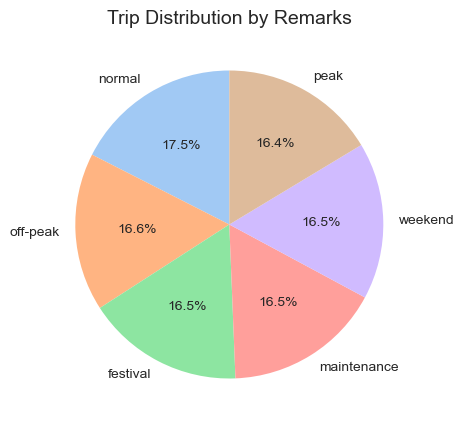

In [33]:
# Trips per Remark Category 
plt.figure(figsize=(7,5))
df['Remarks'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Trip Distribution by Remarks", fontsize=14)
plt.ylabel("")
plt.show()

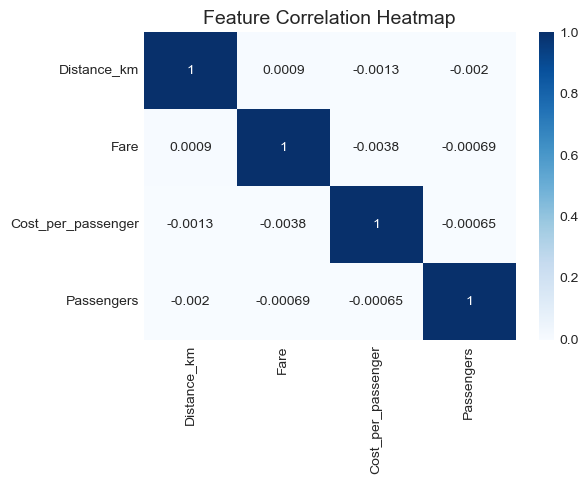

In [34]:
# Correlation Heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(df[['Distance_km','Fare','Cost_per_passenger','Passengers']].corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [35]:
# -------------------- 1. Create Route Column --------------------
df['Route'] = df['From_Station'] + " → " + df['To_Station']

C:\Users\15jan\AppData\Local\Temp\ipykernel_25860\484742986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Route', x='Trip_Count', data=top_routes, palette="viridis")
C:\Users\15jan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128646 (\N{TRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


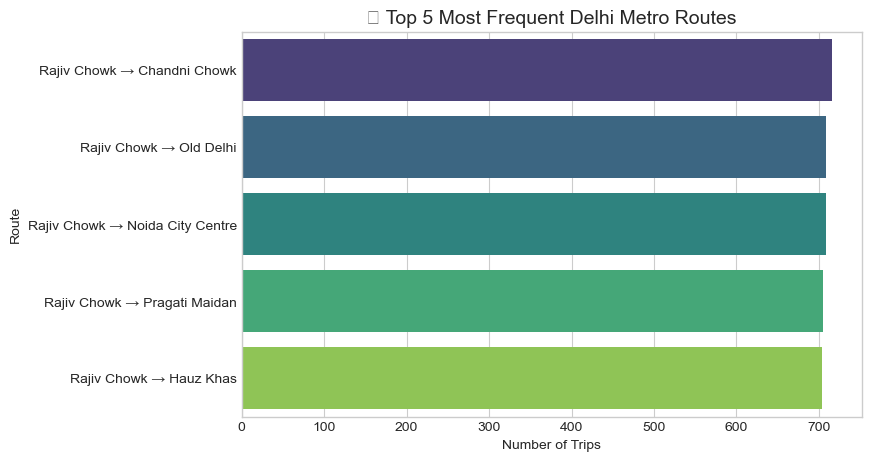

Top 5 Most Frequent Routes:
                              Route  Trip_Count
0      Rajiv Chowk → Chandni Chowk         716
1          Rajiv Chowk → Old Delhi         709
2  Rajiv Chowk → Noida City Centre         709
3     Rajiv Chowk → Pragati Maidan         705
4          Rajiv Chowk → Hauz Khas         704


In [36]:
# -------------------- 2. Top 5 Most Frequent Routes --------------------
top_routes = (
    df['Route']
    .value_counts()
    .head(5)
    .reset_index()
)

# Rename columns correctly
top_routes.columns = ['Route', 'Trip_Count']

# Plot
plt.figure(figsize=(8,5))
sns.barplot(y='Route', x='Trip_Count', data=top_routes, palette="viridis")
plt.title("🚆 Top 5 Most Frequent Delhi Metro Routes", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Route")
plt.show()

print("Top 5 Most Frequent Routes:\n", top_routes)


C:\Users\15jan\AppData\Local\Temp\ipykernel_25860\239209285.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='From_Station', x='Trip_Count', data=top_from, palette="crest")
C:\Users\15jan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


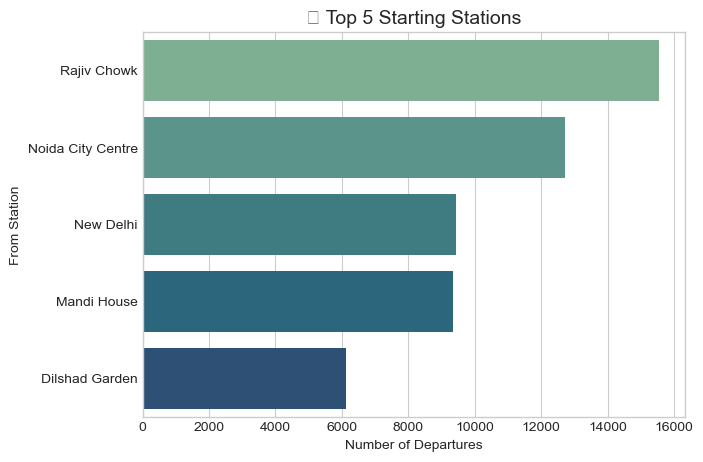


Top 5 Starting Stations:
         From_Station  Trip_Count
0        Rajiv Chowk       15556
1  Noida City Centre       12731
2          New Delhi        9433
3        Mandi House        9334
4     Dilshad Garden        6123


In [37]:
# -------------------- 3. Top 5 Most Common 'From_Station' --------------------
top_from = (
    df['From_Station']
    .value_counts()
    .head(5)
    .reset_index()
)

# Rename columns properly
top_from.columns = ['From_Station', 'Trip_Count']

# Plot
plt.figure(figsize=(7,5))
sns.barplot(y='From_Station', x='Trip_Count', data=top_from, palette="crest")
plt.title("🏁 Top 5 Starting Stations", fontsize=14)
plt.xlabel("Number of Departures")
plt.ylabel("From Station")
plt.show()

print("\nTop 5 Starting Stations:\n", top_from)


C:\Users\15jan\AppData\Local\Temp\ipykernel_25860\1216063083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='To_Station', x='Trip_Count', data=top_to, palette="magma")
C:\Users\15jan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


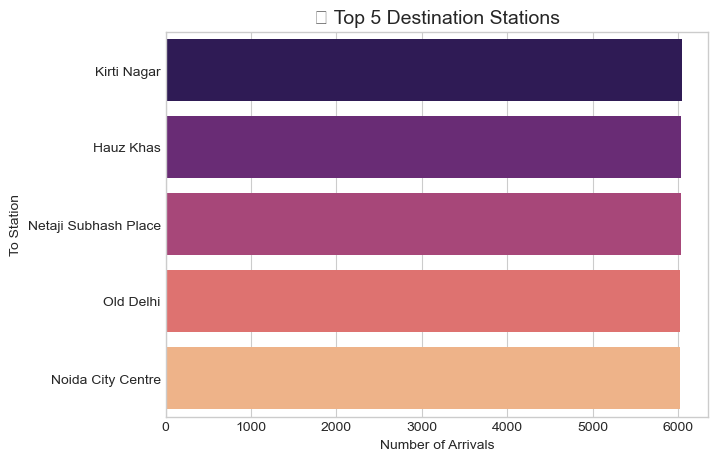


Top 5 Destination Stations:
              To_Station  Trip_Count
0           Kirti Nagar        6045
1             Hauz Khas        6036
2  Netaji Subhash Place        6028
3             Old Delhi        6020
4     Noida City Centre        6020


In [38]:
# -------------------- 4. Top 5 Most Common 'To_Station' --------------------
top_to = (
    df['To_Station']
    .value_counts()
    .head(5)
    .reset_index()
)

# Rename columns properly
top_to.columns = ['To_Station', 'Trip_Count']

# Plot
plt.figure(figsize=(7,5))
sns.barplot(y='To_Station', x='Trip_Count', data=top_to, palette="magma")
plt.title("🎯 Top 5 Destination Stations", fontsize=14)
plt.xlabel("Number of Arrivals")
plt.ylabel("To Station")
plt.show()

print("\nTop 5 Destination Stations:\n", top_to)


In [39]:
# Group by route and sum total passengers
route_passengers = (
    df.groupby(['From_Station', 'To_Station'])
      .agg({'Passengers': 'sum'})
      .reset_index()
      .sort_values(by='Passengers', ascending=False)
      .head(5)
)

print("🚆 Top 5 Routes by Total Passengers:\n")
print(route_passengers)

🚆 Top 5 Routes by Total Passengers:

    From_Station         To_Station  Passengers
507  Rajiv Chowk      Chandni Chowk     14258.0
521  Rajiv Chowk  Noida City Centre     14067.0
515  Rajiv Chowk        Kirti Nagar     14019.0
522  Rajiv Chowk          Old Delhi     14012.0
509  Rajiv Chowk          Hauz Khas     13976.0


In [40]:
# ✅ Total Fare (Sum of all Fare values)
total_fare = df['Fare'].sum()

print(f"💰 Total Fare Collected: ₹{total_fare:,.2f}")

💰 Total Fare Collected: ₹14,977,739.02


In [41]:
# Key KPIs
total_fare = df['Fare'].sum()
total_passengers = df['Passengers'].sum()
average_fare = df['Fare'].mean()
average_cost_per_passenger = df['Cost_per_passenger'].mean()
total_trips = df.shape[0]

print("📈 --- Delhi Metro KPIs ---")
print(f"🚆 Total Trips: {total_trips}")
print(f"👥 Total Passengers: {total_passengers:,}")
print(f"💰 Total Fare Collected: ₹{total_fare:,.2f}")
print(f"💸 Average Fare per Trip: ₹{average_fare:,.2f}")
print(f"🧍 Average Cost per Passenger: ₹{average_cost_per_passenger:,.2f}")


📈 --- Delhi Metro KPIs ---
🚆 Total Trips: 142456
👥 Total Passengers: 2,820,537.0
💰 Total Fare Collected: ₹14,977,739.02
💸 Average Fare per Trip: ₹105.14
🧍 Average Cost per Passenger: ₹62.47
